In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
from __future__ import print_function

## Think Bayes: Bayesian Statistics Made Simple

There are several excellennt modules for doing Bayesian statistics in Python, incluidng ```pymc``` and ```OpenBUGS```.
I chose not to use them for this book because you need a fair amount of background knowledge to get started with these modules, and I want to keep the prerequisites minimal. If you know Python and a little bit about probability, you are ready to start this book.


Chapter 1 is about probability and Baye's theorem; it has no code. Chapter 2 introduces ```Pmf```, a thinly disguised Python dictionary I use to represent a probablity mass function (PMF). Then Chapter 3 introduces ```Suite```, a kind of Pmf that provides a framework for doing Bayesian updates. And that's just about all there is to it.

Well, almost. In some of the later chapters, I use analytic distributions including the Guassian (normal) distribution, the exponential and Poisson distributions, and the beta distribution. In Chapter 15 I break out the less-common Dirichlet distribution, but I explain it as I go along. If you are not familiar with these distributions, you can read about them on Wikipedia. 

In [57]:
785000./311000000

0.0025241157556270097

The usual notation for conditional probability is 
$p(A|B)$, which is the probablity of $A$ given that $B$ is true. In this example, $A$ represents the prediction that I will have a heart attack in teh next year, and $B$ is the set of conditions I listed.

### Conjoint probability

**Conjoint probability** is a fancy way to say the probability that two things are true. I write $p(A \mbox{and} B)$ to mean the probability that $A$ and $B$ are both true.
In geneneral, the probability of a conjunction is

$
p(A \mbox{and} B) = p(A) p(B|A)
$

for any $A$ and $B$. So if the chance of rain on any given day is 0.5, the chance of rain on two consecutive days is not 0.25, but probably a bit higher.

#### The cookie problem

We'll get to Bayes's theorem soon, but I wanted to motivate it with an example called the cookie problem. Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at ranom. The cookie is vanilla. What is the probability that it came from Bowl 1?

This is a conditional probability; we want $p(\mbox{Bowl 1} | \mbox{vanilla})$, but it is not obvious how to compute it. If I asked a different question - the probability of a vanilla cookie given Bowl 1 - it would be easy:

$
p(\mbox{vanilla} | \mbox{Bowl 1}) = \frac{30}{40}
$

Sadly, $p(A|B)$ is _not_ the same as $p(B|A)$, but there is a way to get from one to the other: Bayes's theorem.

#### Bayes's theorem

At this point we have everything we need to derive Bayes's theorem. We'll start with the observation that conjunction is commutataive; that is

$
p(A \mbox{and} B) = p(B \mbox{and} A)
$

Next, we write the probability of a conjunction:

$
p(A \mbox{and} B) = p(A)p(B|A)
$

Since we have not said anything about what $A$ and $B$ mean, they are interchangeable. Interchanging them yields

$
p(B \mbox{and} A) = p(B)p(A|B)
$

That's all we need. Pulling these pieces together, we get

$
p(B)p(A|B) = p(A)p(B|A)
$

which means there are two ways to compute the conjunction. If you have $p(A)$, you multiply by the conditional probability
$p(B|A)$. Or you can do it the other way around: if you know $p(B)$, you multiply by $p(A|B)$. Either way you should get the same thing. 
Finally we can divide through by $p(B)$:

$
p(A|B)  = \frac{p(A) p(B|A)}{p(B)}
$

And that's Bayes's theorem! It might not look like much, but it turns out to be suprisingly powerful.

For example, we can use it to solve the cookie problem. I'll write $B_1$ for the hypothesis that the cookie came from Bowl 1 and $V$ for the vanilla cookie. Plugging into Bayes's theorem we get

$
p(B_{1} | V) = \frac{p(B_{1})p(V | B_{1})}{p(V)}
$

The term on the left is what we want: the probability of Bowl 1, given that we chose a vanilla cookie. the terms on the right are:

* $p(B_1)$: This is the probability that we chose Bowl 1, unconditioned by what kind of cookie we got. Since the problem says we chose a bowl at random, we can assume $p(B_1) = \frac{1}{2}$.
* $p(V|B_1)$: This is the probability of getting a vanilla cookie from Bowl 1, which is $\frac{3}{4}$.
* $p(V)$: This is the probability of drawing a vanilla cookie from either bowl. Since we had an equal change of choosing either bowl and the bowls contain the same number of cookies, we had the same chance of choosing any cookie. use $p(B_1)p(V|B_1) + p(B_2)p(V|B_2) = \frac{5}{8}$.

#### The diachronic interpretation

There is another way to think of Bayes's theorem: it gives us a way to update the probability of a hypothesis, $H$, in light of some body of data, $D$.

This way of thinking about Baye's theorem is called the **diachronic interpretation**. "Diachronic" means that something is happening over time; in this case the probability of the hypothesis changtes, over time, as we see new data.

Rewriting Bayes's theorem with $H$ and $D$ yields:

$
\begin{equation}
p(H|D) = \frac{p(H) p(D|H)}{p(D)}
\end{equation}
$

In this interpretatoin, each term has a name:

* $p(H)$ is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**
* $p(H|D)$ is what we want to compute, the probability of the hypothesis after we see the data, called the **posterior**.
* $p(D|H)$ is the probablity of the data under the hypothesis, called the **likelihood**.
* $p(D)$ is the probability of the data under any hypothesis, called the **normalizing constant**.

Sometimes we can compute the prior based on background information. For example, the cookie problem specifies that we choose a bowl at random with equal probability. In other cases the prior is subjective; that is, reasonable people might disagree, either because they use different background information or because they interpret the same information differently.
The likelihood is usually the easiest part to compute. In the cookie problem, if we know which bowl the cookie came from, we find the probability of a vanilla cookie by counting.

The normalizing constant can be tricky. It is supposed to be the probability of seeing the data under any hypothesis at all, but in the most general case it is hard to nail down what that means.

Most often we simplify things by specifiying a set of hypothesis that are

* **Mutually exclusive**: At most one hypothesis in the set can be true, and
* **Collectively exhaustive**: There are no other possiblities; at least one of the hypotheses has to be true.

I use the word **suite** for a set of hypothesis that has these properties.

In the cookie problem, there are only two hypotheses - the cookie came from Bowl 1 or Bowl 2 - and they are mutually exclusive and collectively exhaustive. In that case we can compute $p(D)$ using the law of total probability, which says that if there are two exclusive ways that something might happen, you can add up the probabilities like this:

$
p(D) = p(B_1)p(D|B_1) + p(B_2)p(D|B_2)
$

#### The M&M problem

M&M's are small candy-coated chocolates that come in a variety of colors. Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.

In 1995, they introduced blue M&M's. Before then, the color mix in a bag of plain M&M's was 30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Tan. Afterward it was 24% Blue, 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me that one is from 1994 and one from 1996. He wont tell me which is which, but he gives me one M&M from each bag. One is yellow and one is green. What is the probability that the yellow one came from the 1994 bag?


This problem is similar to the cookie problem, with the twist that I draw one samle form each bowl/bag. This problem also gives me a chance to demonstrate the table method, which is useful for solving problems like this on paper. In the next chapter we will solve them computationally.

The first step is to enumate the hypothesis. The bag the yellow M&M came from I'll call Bag 1; I'll call the other Bag 2.
So the hypotheses are:

* A: Bag 1 is from 1994, which implies that Bag 2 is from 1996.
* B: Bag 1 is from 1996 and Bag 2 from 1994.


Now we construct a table with a row for each hypothesis and a column for each term in Baye's theorem:


|   | Prior | Likelihood | | Posterior |
-------------| :-----------: | :------------: | :------------: | :-------------: |
|  | $p(H)$ | $p(D|H)$  |   $p(H)p(D|H)$ | $p(H|D)$ |
| A | 1/2 |  (20)(20)    | 200 |    20/27 | 
| B | 1/2 | (14)(10)  |     70 | 7/27 | 



The first column has the priors. Based on the statement of the problem, it is reasonable to choose $p(A) = p(B) = 1/2$.

The second column has the likelihoods, which follow from the infomration in the problem. For example, if $A$ is true, the yellow M&M came from the 1994 bag with probability 20%, and the green came from the 1996 bag with probability 20%. If B is true, the yellow M&M came from the 1996 bag with probability 14%, and the green came from teh 1994 bag with probabilty 10%. Because the selections are independent, we get the conjoint probability by multiplying.

The third column is just he product of the previous two. The sum of this column, 270, is the normalizing constant. To get the last column, which contains the posteriors, we divide the third column by the normalizing constant.

That's it. Simple, right?

Well, you might be bothered by one detail. I write $p(D|H)$ in terms of percentages, not probabilities, which means it is off by a factor of 10,000. But that cancels out when we divide through by the normalizing constant, so it doesn't affect the result.

When the set of hypotheses is mutually exlusive and collectively exhaustive, you can multiply the likelihoods by any factor, if it is convenient, as long as you apply the same factor to the entire column.


```
|             |          Grouping           ||
First Header  | Second Header | Third Header |
 ------------ | :-----------: | -----------: |
Content       |          *Long Cell*        ||
Content       |   **Cell**    |         Cell |

New section   |     More      |         Data |
And more      | With an escaped '\|'         ||  
[Prototype table]
```

#### The Monty Hall problem

The Monty Hall problem might be the most contentious question in the history of probability. The scenario is simple, but the correct answer is so counterintuitive that many people just can't accept it, and many smart people have embarrassed themselves not just by getting it wrong but by arguing the wrong side, aggressively, in public.

Monty Hall was the orginal host of the game show _Let's Make a Deal_. The Monty Hall problem is based on one of the regular games on the show. If you are on the show, here's what happens:

* Monty shows you three closed doors and tells you that there is a prize behind each door; one prize is a car, the other two are less valuable prizes like peanut butter and fake finger nails. The prizes are arranged at random.
* The object of the game is to guess which door has the car. If you guess right, you get to keep the car.
* You pick a door, which we will call Door A. We'll call the other doors B and C.
* Before opening the door you chose, Monty increases the suspense by opening either Door B or C, whichever does not have the car. (If the car is actually behind Door A, Monty can safely open Bor C, so he chooses at random).
* Then Monty offers you the option to stick with your original choice or switch to the one remaining unopened door.

The question is, should you "stick" or "switch" or does it make no difference?

Most people have the stong intuition that it makes no difference. There are two doors left, they reason, so the chance that the car is behind Door A is 50%.

But that is wrong. In fact, the chance of winning if you stick with Door A is only 1/3; if you switch, your chances are 2/3.

By applying Bayes's theorem, we can break this problem into simple pieces, and maybe convince ourselves that the correct answer is, in fact, correct.

To start, we should make a careful statement of the data. In this case $D$ consists of two parts: Monty chooses Door B _and_ there is no car there.

Next we define three hypothesis: A, B, and C represent the hypothesis that the car is behind Door A, Door B, or Door C. Again, let's apply the table method:


|   | Prior | Likelihood | | Posterior |
-------------| :-----------: | :------------: | :------------: | :-------------: |
|  | $p(H)$ | $p(D|H)$  |   $p(H)p(D|H)$ | $p(H|D)$ |
| A | 1/3 |  1/2    | 1/6 |    1/3 | 
| B | 1/3 | 0  |     0 | 0 | 
| C | 1/3 |  1 |   1/3 |   2/3 |

In [58]:
from thinkbayes import Pmf

In [59]:
pmf = Pmf()

In [60]:
for x in [1,2,3,4,5,6]:
    pmf.Set(x, 1/6.0)

```Pmf``` creates an empty Pmf with no values. The ```Set``` method sets the probability associated with each value to 1/6.

In [61]:
pmf.Normalize()

0.9999999999999999

In [62]:
pmf

In [63]:
pmf = Pmf()
pmf.Set('Bowl 1', 0.5)
pmf.Set('Bowl 2', 0.5)

This distribution, which contains the priors for each hypothesis, is called (wait for it) the **prior distribution**.

To update the distribution based on new data (the vanilla cookie), we multiply each prior by the corresponding likelihood. The likelihood of drawing a vanilla cookie from Bowl 1 is 3/4. The likelihood fo r Bowl 2 is 1/2.

In [64]:
pmf.Mult('Bowl 1', 0.75)
pmf.Mult('Bowl 2', 0.5)

After this update, the distribution is no longer normalized, but because these hypotheses are mutually exclusive and collectively exhaustive, ew can **renormalize**.

In [65]:
pmf.Normalize()

0.625

The result is a distribution that contains the posterior probability for each hypothesis, which is called (wait now) the **posterior distribution**.
Finally, we can get the posterior probability for Bowl 1.

In [66]:
print(pmf.Prob('Bowl 1'))

0.6


### The Bayesian framework

Before we go on to other problems, I want to rewrite the code from the previous section to make it more general. First I'll define a class to encapsulate the code related to this problem:

```
class Cookie(Pmf):

    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
```

A Cookie object is a Pmf that maps from hypotheses to their probabilities. The ```__init__``` method gives each hypotheses the same prior probability. As in the previous section, there are two hypotheses:

```
hypos = ['Bowl 1', 'Bowl 2']
pmf = Cookie(hypos)
```


```Cookie``` provides an ```Update``` method that takes data as a parameter and updates the probabilities:

```
def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
```


```Update``` loops through each hypothesis in the suite and multiplies its probability by hte likelihood of the data under thehypothesis, which is computed by ```Likelihood```:

```
mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }

    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
```

Here's wha the update looks like:

In [67]:
# %load cookie2.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from thinkbayes import Pmf


class Cookie(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """Updates the PMF with new data.

        data: string cookie type
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: string bowl ID
        """
        mix = self.mixes[hypo]
        like = mix[data]
        return like


def main():
    hypos = ['Bowl 1', 'Bowl 2']

    pmf = Cookie(hypos)

    pmf.Update('vanilla')

    for hypo, prob in pmf.Items():
        print(hypo, prob)


if __name__ == '__main__':
    main()


Bowl 2 0.4
Bowl 1 0.6


In [68]:
hypos = ['Bowl 1', 'Bowl 2']
pmf = Cookie(hypos)
pmf.Update('vanilla')

for hypo, prob in pmf.Items():
    print(hypo, prob)

dataset = ['vanilla','chocolate','vanilla']
for data in dataset:
    pmf.Update(data)
    
for hypo, prob in pmf.Items():
    print(hypo, prob)

Bowl 2 0.4
Bowl 1 0.6
Bowl 2 0.372093023256
Bowl 1 0.627906976744


#### The Monty Hall problem

To solve the Monty Hall problem, I'll define a new class

```
class Monty(Pmf):

    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
```

So far ```Monty``` and ```Cookie``` are exactly the same. And the code that creates the Pmfs is the same, except for the names of the hypotheses:

```
hypos = 'ABC'
pmf = Monty(hypos)
```

Calling ```Update``` is pretty much the same:

```
def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
```

The only part that requires some work is ```Likelihood```:

```
def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1
```

Finally, printing the results is the same:

```
for hypo, prob in pmf.Items():
        print hypo, prob
```

In [69]:
%run monty.py

A 0.333333333333
B 0.0
C 0.666666666667


In [70]:
hypos = 'ABC'
pmf = Monty(hypos)

In [71]:
data = 'C'
pmf.Update(data)

In [72]:
for hypo, prob in pmf.Items():
    print(hypo, prob)

A 0.333333333333
C 0.0
B 0.666666666667


### Encapsulating the framework

Now that we see what elements of the framework are the same, we can encapsulate them in an object - a ```Suite``` is a ```Pmf``` that provides ```__init__```, ```Update```, and ```Print```:


```
class Suite(Pmf):
    """Represents a suite of hypotheses and their probabilities."""

    def __init__(self, hypo=tuple()):
        """Initializes the distribution."""

    def Update(self, data):
        """Updates each hypothesis based on the data."""

    def Print(self):
        """Prints the hypotheses and their probabilities."""
```

This implementation of ```Suite``` is in ```thinkbayes.py```. To use ```Suite```, you should write a class that inherits from it and provides ```Likelihood```. For example, here is the solution to the Monty Hall problem rewritten to use ```Suite```:

```
from thinkbayes import Suite

class Monty(Suite):

    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1
```

In [73]:
# %load monty2.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from thinkbayes import Suite


class Monty(Suite):
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: string name of the door where the prize is
        data: string name of the door Monty opened
        """
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1


def main():
    suite = Monty('ABC')
    suite.Update('B')
    suite.Print()


if __name__ == '__main__':
    main()


A 0.333333333333
B 0.0
C 0.666666666667


#### The M&M problem

We can use the ```Suite``` framework to solve the M&M problem. Writing the ```Likelihood``` function is tricky, but everything else is straightforward.

First I need to encode the color mixes from before and after 1995:

```
mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10)

mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13)
```

Then I have to encode the hypotheses:

```
hypoA = dict(bag1=mix94, bag2=mix96)
    hypoB = dict(bag1=mix96, bag2=mix94
```

```hypoA``` represents the hypothesis that Bag 1 is from 1994 and Bag 2 from 1996, ```hypoB``` is the other way around.

Next I map from the name of the hypothesis to the representation:

```
 hypotheses = dict(A=hypoA, B=hypoB)
```


And finally I can write ```Likelihood```. In this case the hypothesis, ```hypo``` is a string, either A or B. The data is atyple that specifies a bag and a color

```
def Likelihood(self, data, hypo):
        bag, color = data
        mix = self.hypotheses[hypo][bag]
        like = mix[color]
```

In [74]:
# %load m_and_m.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from thinkbayes import Suite


class M_and_M(Suite):
    """Map from hypothesis (A or B) to probability."""

    mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10,
                 blue=0)

    mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13,
                 tan=0)

    hypoA = dict(bag1=mix94, bag2=mix96)
    hypoB = dict(bag1=mix96, bag2=mix94)

    hypotheses = dict(A=hypoA, B=hypoB)

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: string hypothesis (A or B)
        data: tuple of string bag, string color
        """
        bag, color = data
        mix = self.hypotheses[hypo][bag]
        like = mix[color]
        return like


def main():
    suite = M_and_M('AB')

    suite.Update(('bag1', 'yellow'))
    suite.Update(('bag2', 'green'))

    suite.Print()


if __name__ == '__main__':
    main()


A 0.740740740741
B 0.259259259259


### Discussion

This chapter presents the ```Suite``` class, which encapsulates the Bayesian update framework.

```Suite``` is an **abstract type***, which means that it defines the interface a Suite is supposed to have, but does not provide a complete implementation. The ```Suite``` interface includes ```Update``` and ```Likelihood```, but the ```Suite``` class only provides an implementation of ```Update```, not ```Likelihood```.



Most of the examples in the following chapters follow the same pattern; for each problem we define a new class that extends Suite, inherits Update, and provides Likelihood. In a few cases we override Update, usually to improve performance.

## Exercsies

### Exercise 1
In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement.

But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws. Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood  accordingly. You might want to dfine a Bowl object.

In [75]:
# %load cookie2.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from thinkbayes import Pmf


class CookieMonster(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """Updates the PMF with new data.

        data: string cookie type
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: string bowl ID
        """
        mix = self.mixes[hypo]
        like = mix[data]
        return like


def main():
    hypos = ['Bowl 1', 'Bowl 2']

    pmf = Cookie(hypos)

    pmf.Update('vanilla')

    for hypo, prob in pmf.Items():
        print(hypo, prob)


if __name__ == '__main__':
    main()


Bowl 2 0.4
Bowl 1 0.6


## Chapter 3 Estimation

### The dice problem

Suppose I have a box that contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 20-sided die. If you have ever played Dungeons & Dragons, you know what the fuck I'm talking about.

Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

Let me suggest a three-step strategy for approaching a problem like this.

!. Choose a presentation for the hypothesis.
2. Choose a representation for the data.
3. write the likelihood function.



In [76]:
class Dice(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [77]:
suite = Dice([4,6,8,12,20])

In [78]:
suite.__dict__

{'d': {4: 0.2, 6: 0.2, 8: 0.2, 12: 0.2, 20: 0.2}, 'log': False, 'name': ''}

In [79]:
suite.Print()

4 0.2
6 0.2
8 0.2
12 0.2
20 0.2


In [80]:
suite.Update(6)

0.08500000000000002

In [81]:
suite.Print()

4 0.0
6 0.392156862745
8 0.294117647059
12 0.196078431373
20 0.117647058824


In [82]:
for roll in [6,8,7,7,5,4]:
    suite.Update(roll)

In [83]:
suite.Print()

4 0.0
6 0.0
8 0.943248453672
12 0.0552061280613
20 0.0015454182665


### The locomotive problem

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. 
Estimate how many locomotives the railroad has.

Based on this observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayesian reasoning, we can break this problem into two steps:

1. What did we know about N before we saw the data?
2. For any given value of N, what is the likelihood of seeeing the data (a locomotive with number 60)?

The answer to the first question is the prior. The answer to the second is the likelihood.

In [84]:
hypos = xrange(1, 1001)

In [85]:
class Train(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [86]:
suite = Train(hypos)

In [87]:
suite.Update(60)

0.0028222671142652746

In [89]:
suite.Items()

trainindex = [t[0] for t in suite.Items()]
trainprob = [t[1] for t in suite.Items()]

In [92]:
dftrain = pd.DataFrame({'prob': trainprob,
                        'number': trainindex}, index=trainindex)

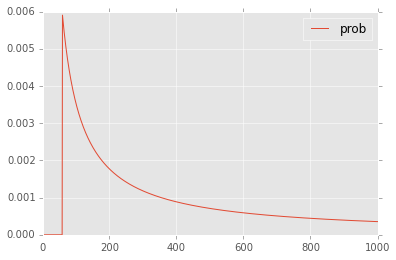

In [94]:
dftrain[['prob']].plot()

There are too many hypotheses to print, so I plotted the results. Not surprinsgly, all values of N below 60 have been eliminated. The most likely value, if you had to guess, is 60. That might not seem like a very good guess; after all, what are the chances that you just happened to see the train with the highest number? Nevertheless, if you want to maximize the chance of getting the answer exactly right, you should guess 60.

But maybe that's not the right goal. An alternative is to compute the mean of the posterior distribution:



In [97]:
(dftrain['prob']*dftrain['number']).sum()/dftrain['prob'].sum()

333.4198932637111